# COSC 3337 - Homework 2 - Ujwal Joshi
Your task for this homework will be to perform exploratory data analysis and predict if a
person is prone to a heart attack (0 or 1). 

Answer the following: Is this a classification or regression task and why?

**answer:** This is a classification task because the target output is categorical.

## Data
The dataset that we will be using for this homework contains the following information:
- `age`
- `sex`
- `cp`: chest pain type
- `trtbps`: resting blood pressure
- `chol`: cholesterol
- `fbs`: fasting blood sugar
- `restecg`: resting electrocardiographic results
- `thalachh`: maximum heart rate achieved
- `exng`: exercise induced angina
- `oldpeak`: previous peak
- `slp`: slope
- `caa`: number of major vessels
- `thall`: thal rate
- `output`: target/labels 0 or 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Step 1
Begin by importing the data and displaying the first 5 observations.  

Answer the following using Pandas:
- How many observations are there in total?
- Are there any missing values?
- How many unique values are in each column?
- Which columns will you treat as categorical, which will you take as continuous, and why?

In [3]:
# displaying first 5 observations
heart_df = pd.read_csv('data.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


How many observations are there in total?

In [8]:
# total observations:
print(f'There are {heart_df.shape[0]} total observations.')

There are 303 total observations.


Are there any missing values?

In [12]:
# missing values
# heart_df.info()
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

How many unique values are in each column?

In [25]:
unique_vals_pd = pd.DataFrame({
    'Unique Value Count': heart_df.apply(lambda col: len(col.unique())),
    'Unique Values': heart_df.apply(lambda col: col.unique())
})

unique_vals_pd

,Unique Value Count,Unique Values
age,41,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
sex,2,"[1, 0]"
cp,4,"[3, 2, 1, 0]"
trtbps,49,"[145, 130, 120, 140, 172, 150, 110, 135, 160, ..."
chol,152,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
fbs,2,"[1, 0]"
restecg,3,"[0, 1, 2]"
thalachh,91,"[150, 187, 172, 178, 163, 148, 153, 173, 162, ..."
exng,2,"[0, 1]"
oldpeak,40,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."


Which columns will you treat as categorical, which will you take as continuous, and why?  
  
**answer:**  
I will treat the following variables as continuous:
- age
- trtbps
- chol
- thalachh
- oldpeak
  
`age` is typically a range of values on a continous scale so it makes sense to treat it as continuous. Bloot pressure and cholestrol (`trtbps` and `chol`) are measured on continuous scales, and `thalachh` is the maximum heart *rate* implying that it is also continous. `oldpeak` can be considered continuous since it representes a previous measurement on a continuous quantitative scale.

I will treat the following variables as categorical:
- sex
- cp
- fbs
- restecg
- exng
- slp
- caa
- thall  

`sex`, `fbs`, and `exng` are binary variables representing the presence or absence of something and thus should be treated as categorical. Similarly `cp`, `restecg`, `slp`, `caa`, and `thall` are variables that represent different categories of results at differing and increasing severities or weights, implying that these are likely ordinal and thus should be treated as categorical variables.

## Step 2
Create a plot of your target variable on the x-axis and counts on the y-axis.

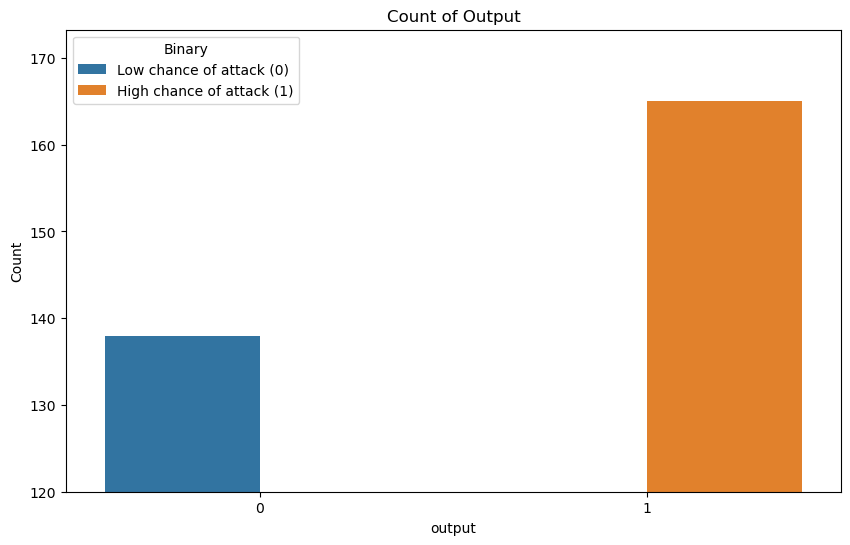

In [35]:
plt.figure(figsize=(10, 6))
sb.countplot(x='output', data=heart_df, hue='output')

plt.ylabel('Count')
plt.title('Count of Output')

plt.legend(title='Binary', labels=['Low chance of attack (0)', 'High chance of attack (1)'])
plt.ylim(120, None)

plt.show()


Answer the following:  
Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not.  
**answer:**  no, there are far more people who are prone to heart attacks represented in this dataset compared to those who are not.

Is working with a balanced dataset important? Why or why not?  
**answer:**  Working with a balanced dataset could be important since it might help prevent the model from becoming biased towards one class of the output.

How can we deal with an imbalanced dataset?  
**answer:**  We could use techniques like stratified k-fold cross-validation to ensure that each fold preserves the class distribution, providing more reliable estimates of model performance.

### Step 3
Create a count plot for *each* of your categorical variables. That is, the variable on the x-axis and counts on the y-axis.  

Answer the following:  
What can you conclude from the plots you created? Are there any interesting findings?  

**answer:**